In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\k2379\\Downloads\\Expanded_data_with_more_features.csv")

In [3]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [4]:
df.describe()


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Dropping null values

In [8]:
df.dropna(inplace=True)
print(df.isnull().sum())

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64


In [9]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

# Dropping unnamed column from the data set

In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

# Transforming weekly study hour column


In [13]:
df['WklyStudyHours'].values

array(['< 5', '5 - 10', '5 - 10', ..., '5 - 10', '5 - 10', '5 - 10'],
      dtype=object)

In [14]:
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace('< 5','0-5')

In [15]:
df['WklyStudyHours'].values


array(['0-5', '5 - 10', '5 - 10', ..., '5 - 10', '5 - 10', '5 - 10'],
      dtype=object)

# Visualizations

Gender Distribution


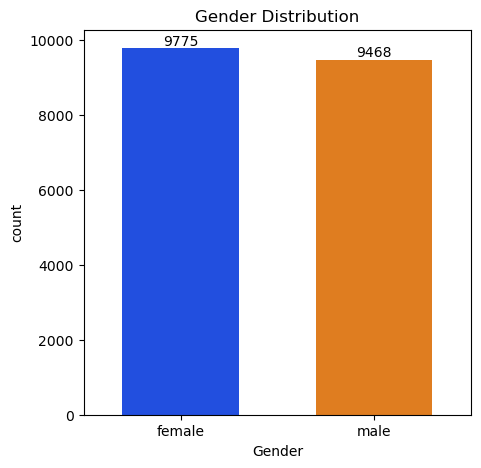

In [18]:
plt.figure(figsize=(5, 5))
ax=sns.countplot(data=df, x='Gender', hue='Gender', palette=sns.color_palette("bright", 2), legend=False, width=0.6)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title("Gender Distribution")
plt.show()



from the above chart we have analyzed that no of females is more than no of males in the data.

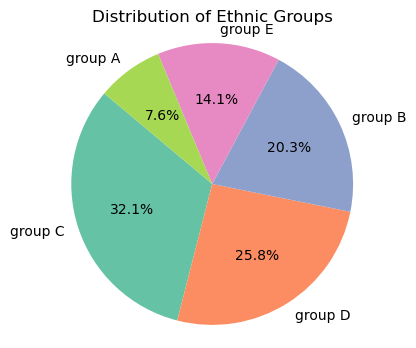

In [20]:
ethnic_group_data = df['EthnicGroup'].dropna()

# Calculate the distribution of ethnic groups
ethnic_group_distribution = ethnic_group_data.value_counts()
colors = plt.get_cmap('Set2').colors
plt.figure(figsize=(4,4))
plt.pie(ethnic_group_distribution, labels=ethnic_group_distribution.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.axis('equal')
plt.title("Distribution of Ethnic Groups")
plt.show()

From the above visualization we found that the group C has the largest share in the data

In [22]:
pe=df.groupby( 'ParentEduc').agg({'MathScore':"mean",'ReadingScore':"mean",'WritingScore':"mean"})
print(pe)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.541478     71.317685     70.551080
bachelor's degree   70.724379     73.560401     73.873964
high school         64.294461     67.284124     65.495892
master's degree     72.293680     75.922677     76.423792
some college        66.578305     69.300113     68.651525
some high school    62.522417     65.438218     63.572171


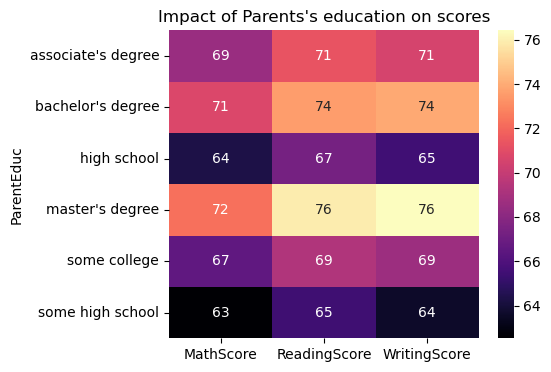

In [23]:
plt.figure(figsize=(5,4))
sns.heatmap(pe,annot=True, cmap="magma")
plt.title("Impact of Parents's education on scores")
plt.show()

from the above chart we have concluded that the good eduction status of the parents had a good impact on their child's score and vice versa.

In [25]:
pms=df.groupby('ParentMaritalStatus').agg({'MathScore':"mean",'ReadingScore':"mean",'WritingScore':"mean"})
print(pms)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.730344     69.816339     68.954545
married              66.705241     69.474248     68.488509
single               66.285590     69.388021     68.543403
widowed              68.083784     70.662162     69.651351


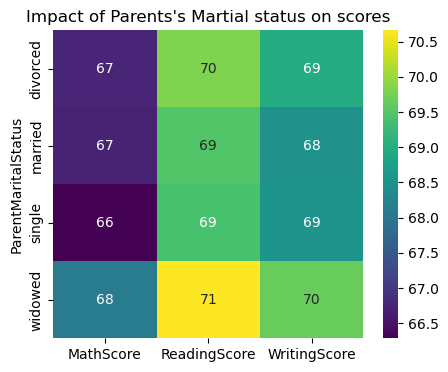

In [26]:
plt.figure(figsize=(5,4))
sns.heatmap(pms,annot=True, cmap="viridis")
plt.title("Impact of Parents's Martial status on scores")
plt.show()

from the above chart we have concluded that there is neglegible impact on student's score due to their parent's martial status.

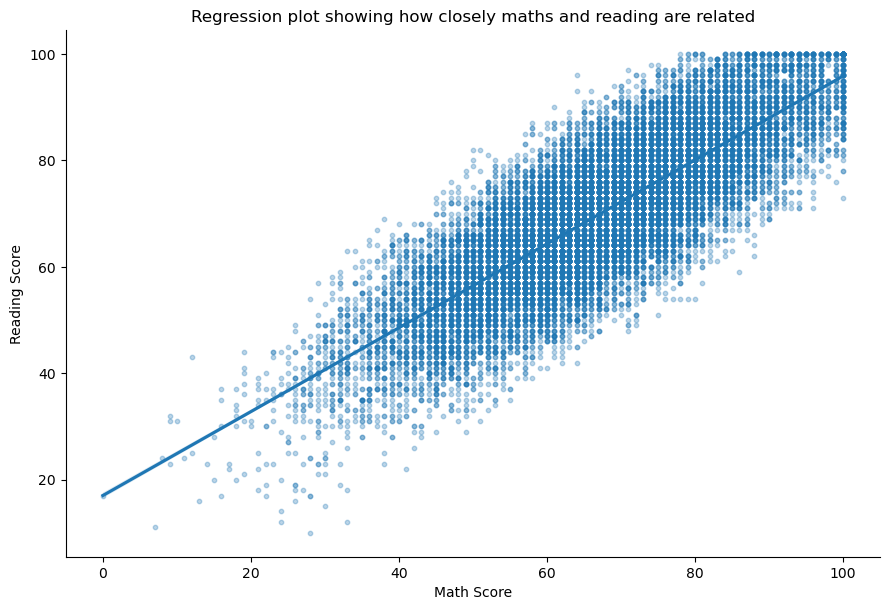

In [28]:
# Adding jitter to reduce overlap
sns.lmplot(x="MathScore", y="ReadingScore", data=df, height=6, aspect=1.5, scatter_kws={"s": 10, "alpha": 0.3})

plt.title('Regression plot showing how closely maths and reading are related')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

plt.show()



the regression line is moving straight upward's showing a positive reelationship between reading and math's score which as the reading score increases the math's score also increases and vice versa

# Finding outliers in data

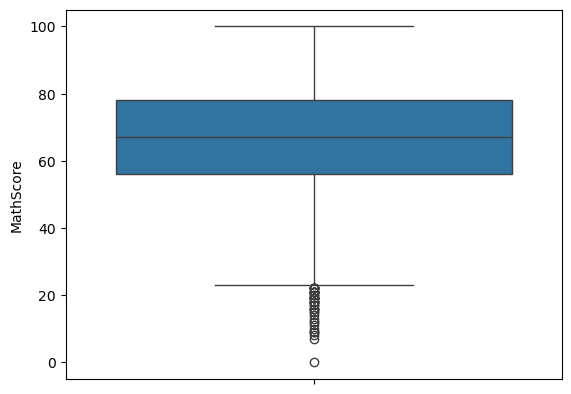

In [31]:
sns.boxplot(data=df, y='MathScore')
plt.show()

In [32]:

ios=df.groupby('PracticeSport').agg({'MathScore':"mean",'ReadingScore':"mean",'WritingScore':"mean"})
print(ios)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.593871     68.774244     67.021334
regularly      67.636547     69.950791     69.641439
sometimes      66.461143     69.438085     68.279568


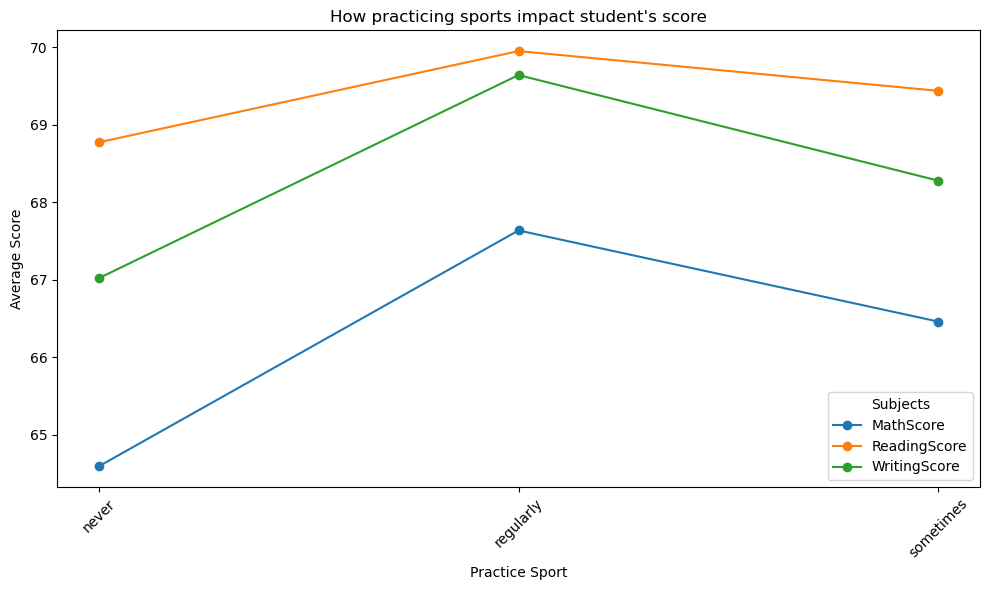

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(ios.index, ios['MathScore'], marker='o', label='MathScore', linestyle='-')
plt.plot(ios.index, ios['ReadingScore'], marker='o', label='ReadingScore', linestyle='-')
plt.plot(ios.index, ios['WritingScore'], marker='o', label='WritingScore', linestyle='-')
plt.title("How practicing sports impact student's score")
plt.xlabel('Practice Sport')
plt.ylabel('Average Score')
plt.xticks(ticks=range(len(ios)), labels=ios.index, rotation=45)
plt.legend(title='Subjects')
plt.tight_layout()
plt.show()


the above graph is showing that the students who practice some sports regurlarly have a higher score in all subjects as compare to those who practice sport sometimes or never ever practice it

it shows that regular excercise has a great impact on stuents learning power and intelligence